NameError: name 'nperiod' is not defined

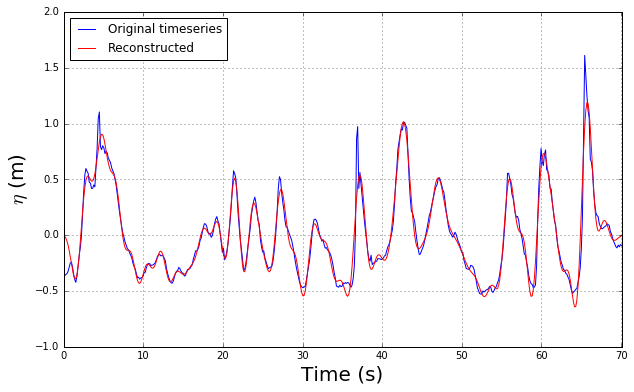

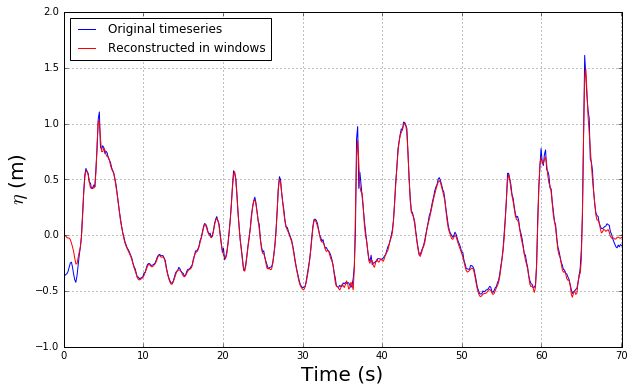

('Time for direct reconstruction:', 2.04187677181244)
('Time for reconstruction in windows:', 2.5161256205902305)


In [4]:
%matplotlib inline
%tb
from matplotlib import pyplot as plt
import numpy as np
import sys
#Append path of local proteus installation
sys.path.append("C:/Users/present/Desktop/proteus/")
#The notebook will work with the following commit:
#https://github.com/erdc-cm/proteus/commit/9bb34b3563b5ddab6cb1dd9f75173da2710d2a41
from proteus import Profiling,SpatialTools
import imp
WT = imp.load_source('WaveTools', 'WaveTools.pyx')
import time as tmclock


#Setting up wave properties
timeSeriesFile="test_timeseries.txt"
skiprows=0
depth=7.
N=48
mwl=0.
waveDir=np.array([1., 0., 0.])
g=np.array([0., 0., -9.81])
rec_direct=True
window_params=None
timeSeriesPosition=np.array([0., 0., 0.])


#Calling the class
TS = WT.TimeSeries(timeSeriesFile, # e.g.= "Timeseries.txt",
                 skiprows,
                 timeSeriesPosition,
                 depth  ,
                 48 ,          #number of frequency bins
                 mwl ,        #mean water level
                 waveDir, 
                 g,
                 cutoffTotal = 0.02,
                 rec_direct = True,
                 window_params = None #If rec_direct = False then wind_params = {"Nwaves":Nwaves,"Tm":Tm,"Window":wind_filt,"Overlap":overlap,"Cutoff":cutoff}
                )

#Importing the time series file
with open("test_timeseries.txt","r") as f:
    timeSeries=np.loadtxt(f)
    
time = timeSeries[:,0]
eta = timeSeries[:,1]
eta -= np.mean(eta)

#Setting up a time interval of n periods (using npoints sampling points per period)

n = len(time)
tnlist=np.linspace(0,time[-1],n)
eta_t = np.zeros(len(tnlist),)
uVel_t = np.zeros(len(tnlist),)



x = timeSeriesPosition
#Calculating time series
t1 =-tmclock.clock()
for i in range(len(tnlist)):
    t = tnlist[i]
    eta_t[i] = TS.eta(x, t)
    uVel_t[i] = TS.u(x, t)[0]
t1 = t1 +  tmclock.clock()
psize=20
#Plotting both time series from time series file and wave class
plt.figure(1, figsize=(10,6), dpi=100)
plt.plot(time, eta, color='blue', label="Original timeseries")
plt.plot(tnlist, eta_t, color='red', label="Reconstructed")
plt.xlim(0, time[-1])
plt.xlabel("Time (s)", size=psize)
plt.ylabel("$\eta$ (m)", size=psize)
plt.legend(loc='upper left')
plt.grid()
plt.show()


#Loading reconstruction in windows
TS = WT.TimeSeries(timeSeriesFile, # e.g.= "Timeseries.txt",
                 skiprows,
                 timeSeriesPosition,
                 depth  ,
                 N ,          #number of frequency bins
                 mwl ,        #mean water level
                 waveDir, 
                 g,
                 cutoffTotal = 0.02,
                 rec_direct = False,
                 window_params ={"Nwaves":3,"Tm":8.,"Window":"costap"} #If rec_direct = False then wind_params = {"Nwaves":Nwaves,"Tm":Tm,"Window":wind_filt,"Overlap":overlap,"Cutoff":cutoff}
                )
#Calculating time series
t2 = -tmclock.clock()
for i in range(len(tnlist)):
    t = tnlist[i]
    eta_t[i] = TS.eta(x, t)
    uVel_t[i] = TS.u(x, t)[0]
t2 = t2 +  tmclock.clock()


#Plotting both time series from time series file and wave class
plt.figure(1, figsize=(10,6), dpi=100)
plt.plot(time, eta, color='blue', label="Original timeseries")
plt.plot(tnlist, eta_t, color='red', label="Reconstructed in windows")
plt.xlim(0, time[-1])
plt.xlabel("Time (s)", size=psize)
plt.ylabel("$\eta$ (m)", size=psize)
plt.legend(loc='upper left')
plt.grid()
plt.show()

print ("Time for direct reconstruction:",t1)
print ("Time for reconstruction in windows:",t2)